# Energy of Quantum Harmonic Oscillators
## 21018836 Pat Xua Tan'
The following section of this notebook is aiming to determine the energy of a Quantum Harmonic Oscillator using the Hamiltonian operator in which the kinetic energy is expressed as KE = -$\frac{1}{2} \psi \frac{d^2 \psi}{dx^2}$ and potential energy is expressed in the form of PE = $\frac{1}{2} k \psi ^2 x^2$ where the second derivative is computed numerically using a truncated Taylor series.

In [111]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math 


### Section on wavefunction and derivatives


In [119]:
'''The spacing sample for the x coordinate dx has to be chosen such that you get the same number of element in the array for 
second derivative as well as the array x so it will be the difference between the end and the start point divided by 
the space interval (dx for differentiation)
'''
dx= 1e-3
N=10/dx
x = np.linspace(-5,5,num=int(N)) # creating the x value of which the function is to be evaluated

# wavefunction array
alpha=1
wavefunction = (2*alpha/np.pi)**(1/4) * np.exp(-alpha*x*x)


# second derivative operator
def d2f(f,dx):
    """Second derivative of a given function
    
    inputs:
    f - function to be differentiated twice
    dx - infinitestimal space interval 
    """
   
    f2x = (f(x + dx) - 2 * f(x) + f(x - dx)) / (dx * dx) # Second derivative obtained from taylor series of f(x)
    return f2x 


<IPython.core.display.Javascript object>


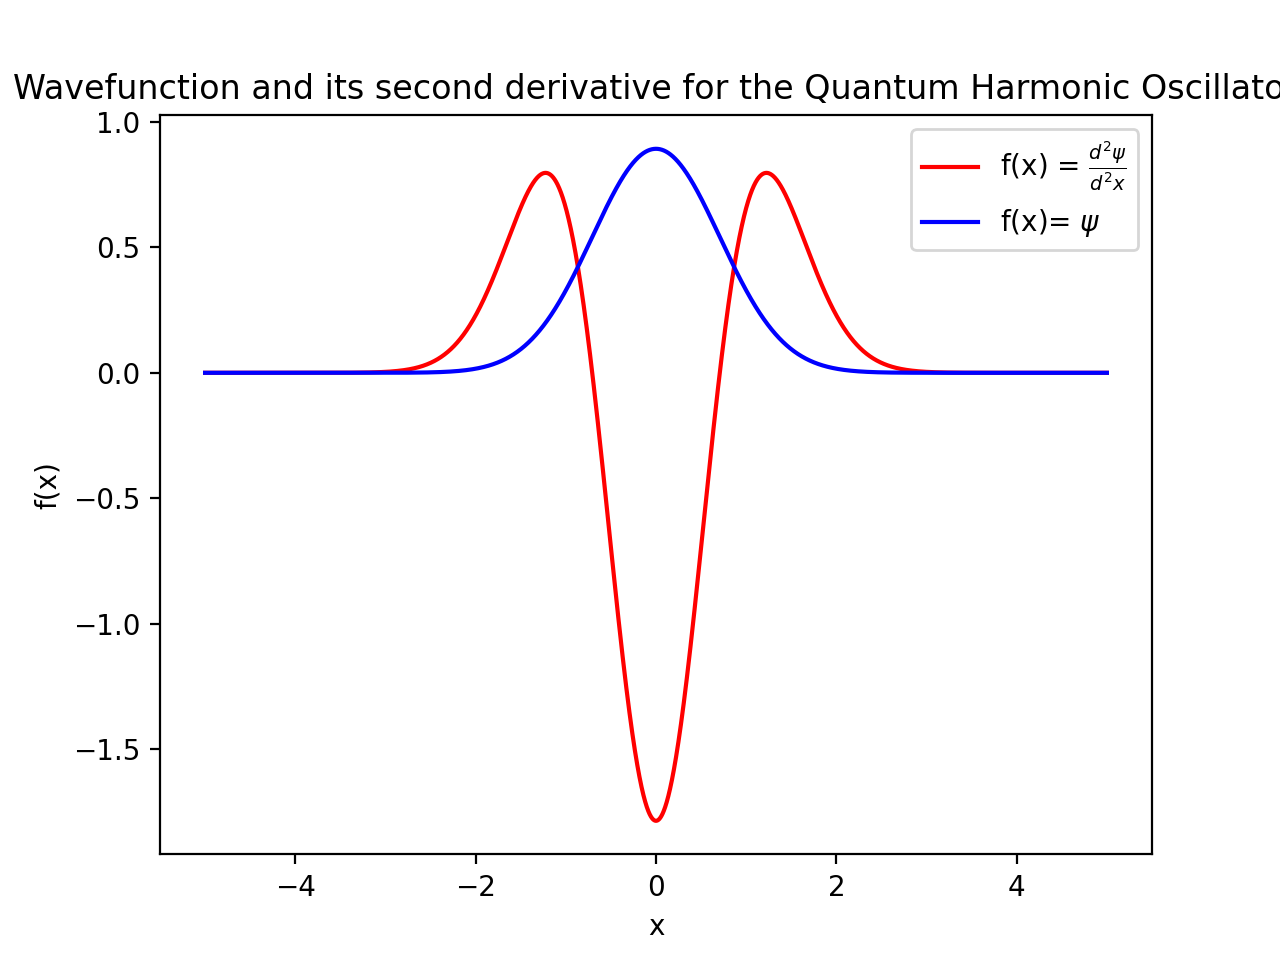

In [120]:
# Calculate d2psi
def psi_f(x):
    return (2*alpha/np.pi)**(1/4) * np.exp(-alpha*x*x)


d2psi = d2f(psi_f,dx) 
'''dx have to be defined at the very start as x is a global variable (it might be much easier if I am allowed to make 
it a local variable.''' 

#plot both psi and second derivative of psi under one single graph
%matplotlib notebook
plt.plot(x,d2psi,color='r',label=r'f(x) = $\frac{d^2 \psi}{d^2 x}$')
plt.plot(x,psi_f(x),color='b',label=r"f(x)= $\psi$")

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wavefunction and its second derivative for the Quantum Harmonic Oscillator')
plt.show()


### Section on evaluating the energy


<IPython.core.display.Javascript object>


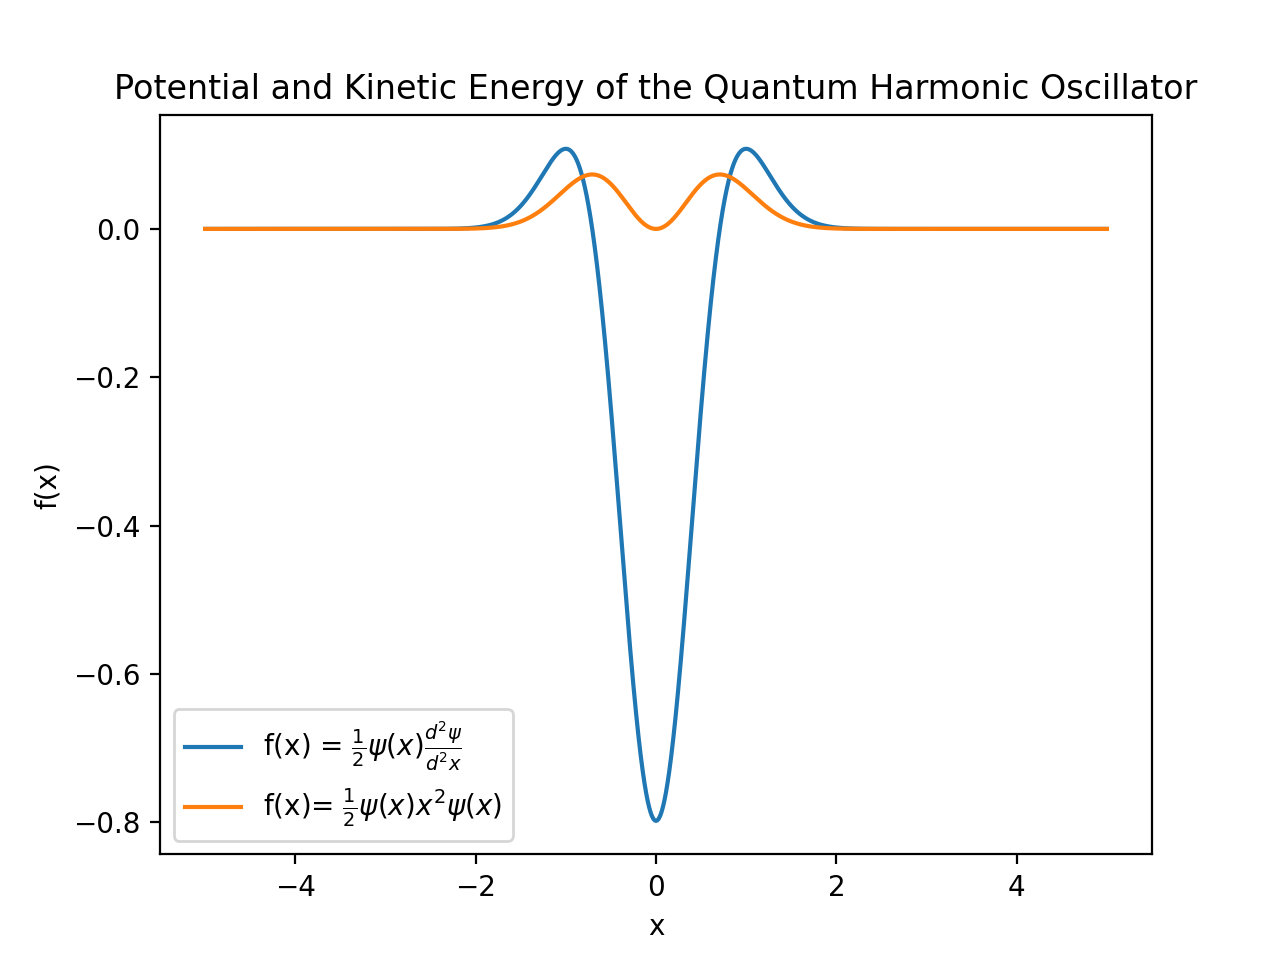

In [121]:
# Plot psi*d2psi and psi*(0.5*x*x)*psi
%matplotlib notebook

dx= 1e-3
N=10/dx
x = np.linspace(-5,5,num=int(N)) # creating the x value of which the function is to be evaluated



KE=(1/2)*psi_f(x)*d2psi
PE=(0.5*x*x)*psi_f(x)*psi_f(x)



plt.plot(x,KE,label=r'f(x) = $\frac{1}{2} \psi(x)  \frac{d^2 \psi}{d^2 x}$')
plt.plot(x,PE,label=r'f(x)= $\frac{1}{2}\psi(x)  x^2 \psi(x) $')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Potential and Kinetic Energy of the Quantum Harmonic Oscillator')
plt.show()

# Remember labels, legend, title

In [125]:
from scipy import integrate
dx= 1e-3
N=10/dx
x = np.linspace(-5,5,num=int(N))

KE_int = - integrate.simps(KE,x)
PE_int =integrate.simps(PE,x)

# Calculate KE using integrate.simps( array, x)
# Calculate PE using integrate.simps( array, x)
# Print results
print('The Value of KE is ',KE_int,'J')    # energy in unit of Joules
print('The Value of PE is ',PE_int,'J')

The Value of KE is  0.49999987499930626 J
The Value of PE is  0.12499999999999999 J


#### Comparison of the calculated values of KE and PE with their respective graph
 Visually from the graph, we can see that KE is much larger than PE (from area under the curve) which is further justified in the calculation of KE and PE where KE is four times larger than PE


### Experimenting section

In [126]:
# Experimenting with a smaller grid/space interval dx
dx= 1e-4
N=10/dx
x = np.linspace(-5,5,num=int(N))

d2psi = d2f(psi_f,dx)

KE=(1/2)*psi_f(x)*d2psi
PE=(0.5*x*x)*psi_f(x)*psi_f(x)
KE_int = - integrate.simps(KE,x)
PE_int =integrate.simps(PE,x)

print('The Value of KE is ',KE_int,'J for a smaller interval dx')    # energy in unit of Joules
print('The Value of PE is ',PE_int,'J for a smaller interval dx')



The Value of KE is  0.49999999880603596 J for a smaller interval dx
The Value of PE is  0.125 J for a smaller interval dx


### Conclusions
The energy values does not changes with changing grid spacing shown above in the experimenting section